### Ejercicio 2 de pandas

In [1]:
%pylab inline
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


In [2]:
elenco = pd.read_csv('https://public-access-s3.s3.amazonaws.com/cast.csv', encoding='utf-8')
elenco.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [3]:
# se simplifica el nombre
e = elenco
len(e)

3564650

In [9]:
# Se usa el %% time para ver el tiempo de ejecución
%time
e[e.title == 'Secret in Their Eyes'].head()

Wall time: 0 ns


,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
423075,Secret in Their Eyes,2015,Joe (VII) Cole,actor,Marzin,6.0
423076,Secret in Their Eyes,2015,Joe (VII) Cole,actor,Beckwith,6.0
481631,Secret in Their Eyes,2015,Alessandro Cuomo,actor,Anthony,NaN
512444,Secret in Their Eyes,2015,Glenn (IV) Davis,actor,Stadium Cop,19.0


In [6]:
# Indexamos por el titulo
e_ti = e.set_index('title')

In [11]:
%%time
e_ti.loc["Secret in Their Eyes"].head()

Wall time: 82.7 ms


,year,name,type,character,n
title,,,,,
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Secret in Their Eyes,2015,Joe (VII) Cole,actor,Marzin,6.0
Secret in Their Eyes,2015,Joe (VII) Cole,actor,Beckwith,6.0
Secret in Their Eyes,2015,Alessandro Cuomo,actor,Anthony,NaN
Secret in Their Eyes,2015,Glenn (IV) Davis,actor,Stadium Cop,19.0


In [23]:
# Veamos si el indice sirve cuando se ordena
e_ti = e.set_index('title').sort_index()
e_ti.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Matthias Chrans,actor,Brian Bennett,13.0
#1 Serial Killer,2013,Yvis Cannavale,actor,Homeless Man,25.0
#1 Serial Killer,2013,Jesse Wang,actor,Mr. Tsai,11.0
#1 Serial Killer,2013,Shoshana Bush,actress,Tricia Arnold,4.0
#1 Serial Killer,2013,Tiley Chao,actress,Mrs. Chang,12.0


In [20]:
%time
e_ti.loc["Secret in Their Eyes"].head()

Wall time: 0 ns


,name,type,character,n
year,,,,
2015,$hutter,actor,2002 Dodger Fan,NaN
2015,Joe (VII) Cole,actor,Marzin,6.0
2015,Joe (VII) Cole,actor,Beckwith,6.0
2015,Alessandro Cuomo,actor,Anthony,NaN
2015,Glenn (IV) Davis,actor,Stadium Cop,19.0


In [24]:
# El indice se puede generar de multiples columnas **Puede tardar más en construirse**

%time
e_ti = e.set_index(['title','year']).sort_index()
e_ti.head()


Wall time: 0 ns


name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [25]:
%%time
# Se puede localizar por multiples columnas
bat89 = e_ti.loc['Batman',1989].sort_index(ascending=False)

Wall time: 356 ms


In [26]:
# Nombre de nuestros indices
bat89.index.names

FrozenList(['title', 'year'])

In [27]:
# Quitar indices, 
bat89.reset_index('year')

,year,name,type,character,n
title,,,,,
Batman,1989,Del Baker,actor,Napier Hood,31.0
Batman,1989,Michael Balfour,actor,Scientist,44.0
Batman,1989,David Baxt,actor,Dr. Thomas Wayne,48.0
Batman,1989,Paul Birchard,actor,Another Reporter,55.0
Batman,1989,Hugo Blick,actor,Young Jack Napier,41.0
...,...,...,...,...,...
Batman,1989,Kit Hollerbach,actress,Becky,29.0
Batman,1989,Sharon Holm,actress,Mrs. Wayne,49.0
Batman,1989,Pam Rose,actress,Party Guest at Wayne Manor,NaN


In [28]:
# Groupby, agrupando por elementos
e = elenco
e = e[e.name == "Brad Pitt"]
e.groupby(['title','year','character']).size()

title                                                       year  character                 
12 Years a Slave                                            2013  Bass                          1
A River Runs Through It                                     1992  Paul Maclean                  1
Abby Singer                                                 2003  Himself                       1
Across the Tracks                                           1990  Joe Maloney                   1
Allied                                                      2016  Max Vatan                     1
Babel                                                       2006  Richard                       1
Being John Malkovich                                        1999  Himself                       1
Burn After Reading                                          2008  Chad Feldheimer               1
By the Sea                                                  2015  Roland                        1
Confessions of a Dangerou

In [29]:
e = elenco
e = e[e.name == "Brad Pitt"]
e.groupby(['title','year']).size()

title                                                       year
12 Years a Slave                                            2013    1
A River Runs Through It                                     1992    1
Abby Singer                                                 2003    1
Across the Tracks                                           1990    1
Allied                                                      2016    1
Babel                                                       2006    1
Being John Malkovich                                        1999    1
Burn After Reading                                          2008    1
By the Sea                                                  2015    1
Confessions of a Dangerous Mind                             2002    1
Cool World                                                  1992    1
Cutting Class                                               1989    1
Fight Club                                                  1999    1
Full Frontal             

<AxesSubplot:xlabel='year'>

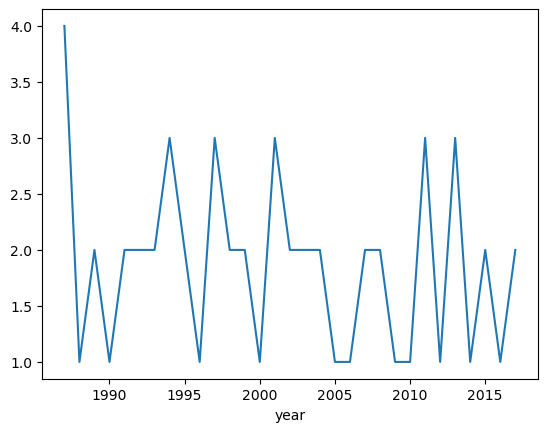

In [30]:
e = elenco
e = e[e.name == "Brad Pitt"]
e.groupby(['year']).size().plot()

<AxesSubplot:xlabel='year'>

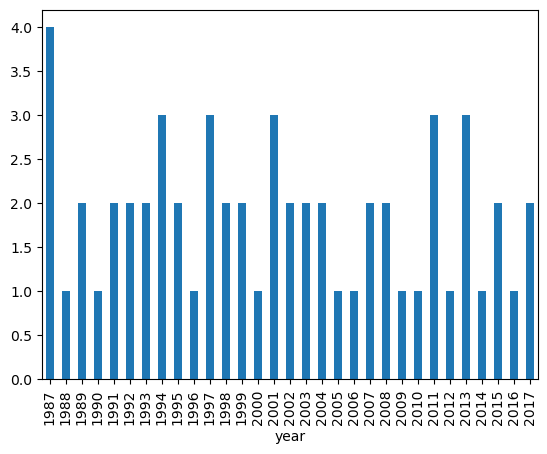

In [31]:
e = elenco
e = e[e.name == "Brad Pitt"]
e.groupby(['year']).size().plot(kind='bar')

<AxesSubplot:xlabel='year'>

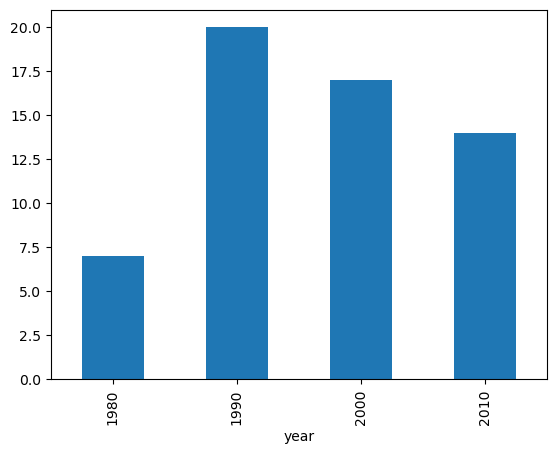

In [32]:
# Por decada
e = elenco
e = e[e.name == "Brad Pitt"]
e.groupby(e.year // 10 * 10).size().plot(kind='bar')

In [33]:
# stack y unstack
e = elenco
e = e[(e.character == "Superman") | (e.character == 'Flash')]
e.head()

,title,year,name,type,character,n
7024,Platoon,1986,Basile Achara,actor,Flash,26.0
40654,"East Side, West Side",1927,Frank Allworth,actor,Flash,14.0
45697,Atom Man vs. Superman,1950,Kirk Alyn,actor,Superman,1.0
45705,Corky of Gasoline Alley,1951,Kirk Alyn,actor,Superman,NaN
45727,Superman,1948,Kirk Alyn,actor,Superman,1.0


In [34]:
e = e.groupby(['character', 'year'])
e.size()

character  year
Flash      1921    1
           1923    1
           1927    1
           1928    3
           1930    1
                  ..
Superman   2013    1
           2014    2
           2015    1
           2016    4
           2017    3
Length: 71, dtype: int64

In [35]:
# Comparemos cada personaje en una columna
e.size().unstack(0).head()

character,Flash,Superman
year,,
1921,1.0,NaN
1923,1.0,NaN
1927,1.0,NaN
1928,3.0,NaN
1930,1.0,NaN


In [43]:
e.size().unstack(1).head(50)

year,1921,1923,1927,1928,1930,1931,1933,1935,1936,1940,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
character,,,,,,,,,,,,,,,,,,,,,
Flash,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,3.0,1.0,...,3.0,1.0,2.0,2.0,3.0,4.0,NaN,2.0,NaN,1.0
Superman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,NaN,1.0,2.0,1.0,4.0,3.0,NaN


In [41]:
e.size().unstack().head()

year,1921,1923,1927,1928,1930,1931,1933,1935,1936,1940,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
character,,,,,,,,,,,,,,,,,,,,,
Flash,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,3.0,1.0,...,3.0,1.0,2.0,2.0,3.0,4.0,NaN,2.0,NaN,1.0
Superman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,NaN,1.0,2.0,1.0,4.0,3.0,NaN


In [44]:
e.size().unstack(0).fillna(0).head()

character,Flash,Superman
year,,
1921,1.0,0.0
1923,1.0,0.0
1927,1.0,0.0
1928,3.0,0.0
1930,1.0,0.0


<AxesSubplot:xlabel='year'>

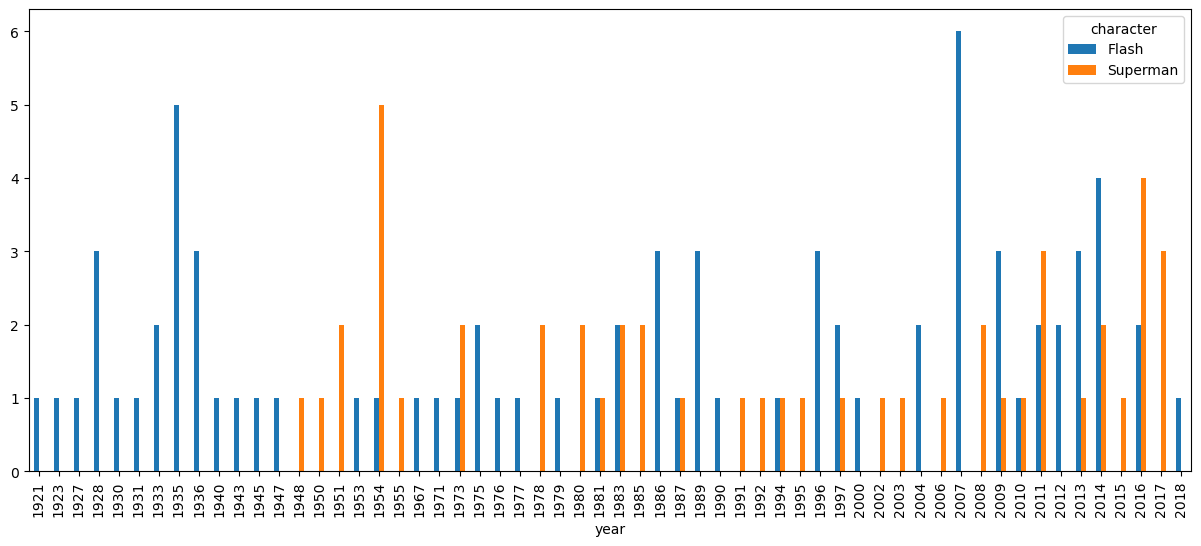

In [45]:
e.size().unstack(0).fillna(0).plot(kind='bar',figsize=(15,6))

<AxesSubplot:xlabel='year'>

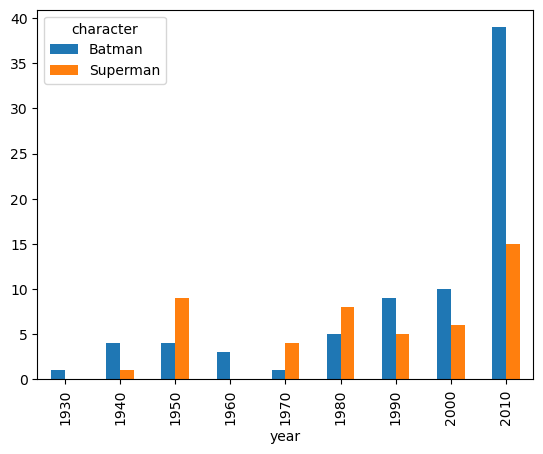

In [46]:
e = elenco

e = e[(e.character == "Superman") | (e.character == 'Batman')]

e = e.groupby(['character', e.year // 10 * 10])
e.size().unstack(0).fillna(0).plot(kind='bar')
#e.size().unstack(0).plot(kind='bar')

In [47]:
e = elenco
e = e[(e.character == "Superman") | (e.character == 'Batman')]

e = e.groupby(['character', e.year // 10 * 10])

e = e.size().unstack(0)
e

e = e.stack(0)
e
e = e.unstack(0)
e

year,1930,1940,1950,1960,1970,1980,1990,2000,2010
character,,,,,,,,,
Batman,1.0,4.0,4.0,3.0,1.0,5.0,9.0,10.0,39.0
Superman,NaN,1.0,9.0,NaN,4.0,8.0,5.0,6.0,15.0


<AxesSubplot:ylabel='year'>

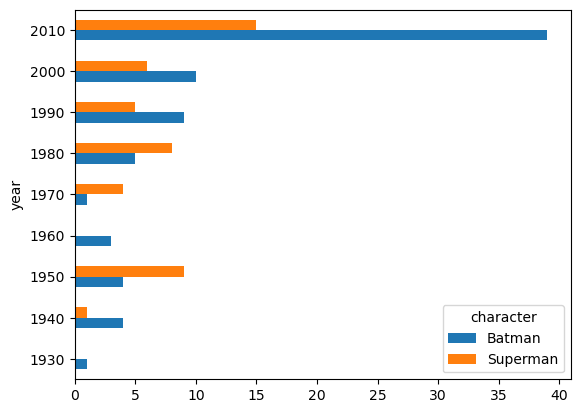

In [48]:
# stack y unstack

e = elenco
e = e[(e.character == "Superman") | (e.character == 'Batman')]
e = e.groupby(['character',e.year //10 * 10]).size() 
e.unstack(0).fillna(0).plot(kind='barh')


In [49]:
# Graficar la diferencia entre el numero de papeles de actores de cada año...

<AxesSubplot:xlabel='year'>

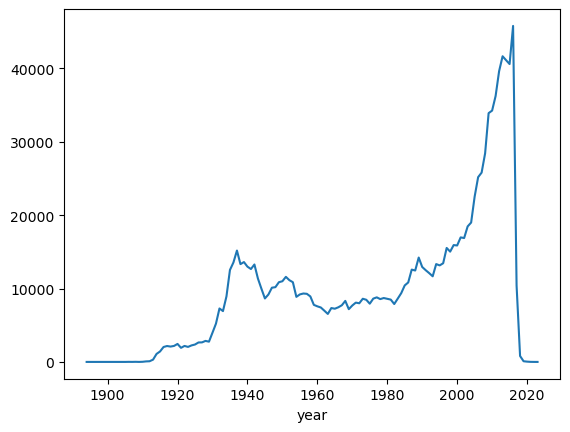

In [50]:
e = elenco
e = e.groupby(['year','type']).size()
e = e.unstack('type').fillna(0)
(e.actor - e.actress).plot()

<AxesSubplot:xlabel='year'>

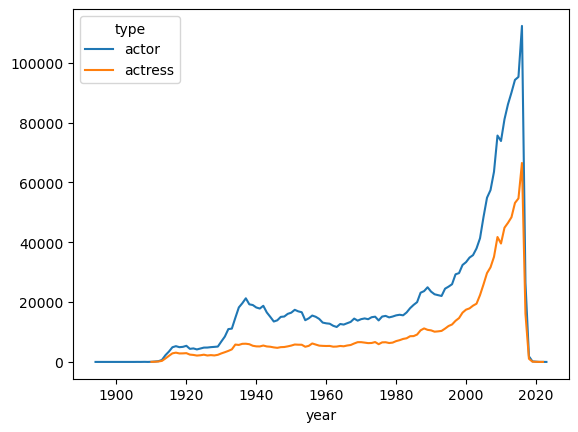

In [51]:
# Graficar en numero de papeles de actores cada año y  para actrices por cada año

e = elenco
e = e.groupby(['year','type']).size()

e = e.unstack('type')

e.plot()

<AxesSubplot:xlabel='year'>

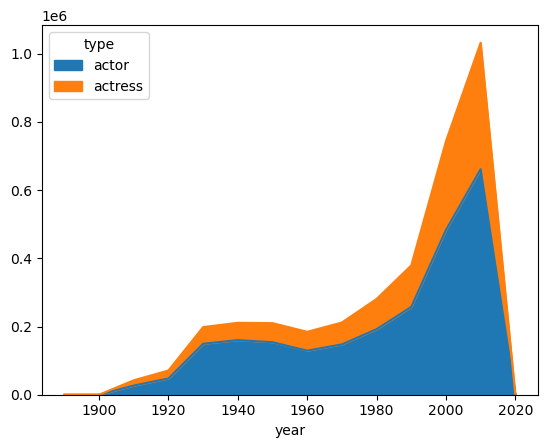

In [52]:
# ahora con gráfico de area

e = elenco
e = e.groupby([e.year//10*10,'type']).size()
e = e.unstack('type')
e.plot(kind='area')

<AxesSubplot:xlabel='year'>

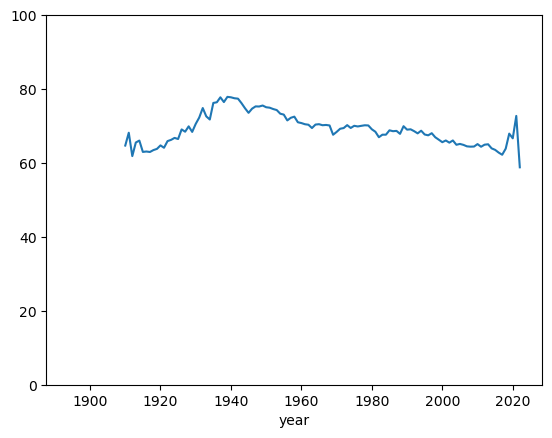

In [53]:
# Graficar por porcentaje de actors

e = elenco
e = e.groupby(['year','type']).size()
e = e.unstack('type')
(e.actor / (e.actor+e.actress) * 100).plot(ylim=[0,100])

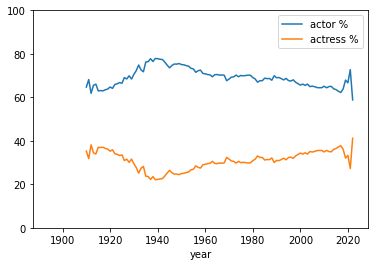

In [38]:
# Graficar el porcentaje de papeles que han sido 
# actores cada año en la historia de la filmografia
# junto al mismo porcentaje pero de actrices

e = elenco
e = e.groupby(['year','type']).size()
e = e.unstack('type')


(e.actor / (e.actor+e.actress) * 100).plot(ylim=[0,100],label="actor %")
(e.actress / (e.actor+e.actress) * 100).plot(ylim=[0,100],label="actress %")
plt.legend()

<AxesSubplot:xlabel='year'>

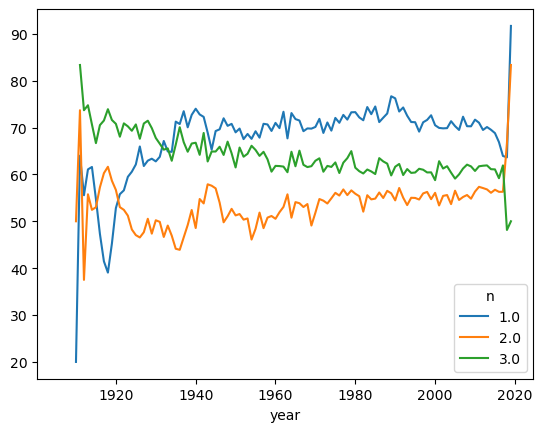

In [54]:
# Graficar 3 lineas con clasificacion "n" de 1 al 3 donde cada linea represente el porcentaje de la clasificacion para los papeles de actores en cada año.

e = elenco
e = e[e.n <=3 ]

e = e.groupby(['year','type','n']).size()


e = e.unstack('type')   # Mover actor, actress a la dimension superior o de keys

p = e.actor / (e.actor+e.actress) * 100   # Reducimos
p = p.unstack('n')                        # Subimos la categoria 'n'
p.plot()

<AxesSubplot:title={'center':'Peliculas con mas actrices en el reparto'}, xlabel='title'>

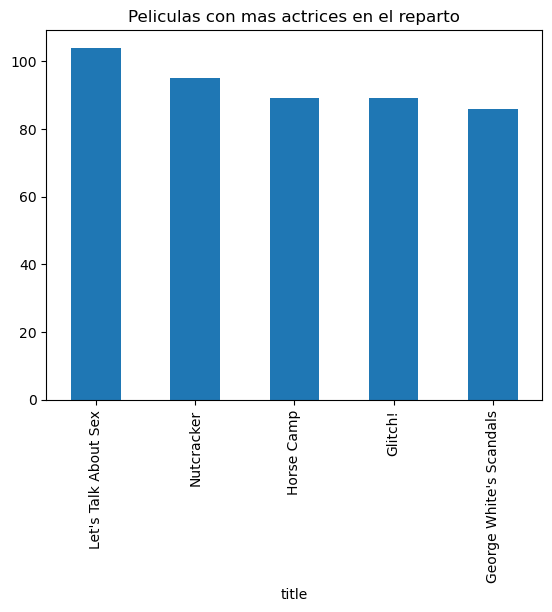

In [55]:
# Encontrar las 5 peliculas de la historia tengan mas mujeres actrices que actores

e = elenco
e = e.groupby(['type','title']).size()
e = e.unstack('type')
e = (e.actress - e.actor).sort_values(ascending=False)
e[:5].plot(kind='bar',title="Peliculas con mas actrices en el reparto")
